# PROJECT - **Unsupervised Anamoly Detection**

---
## DATASET - **Healthcare Providers Data For Anomaly Detection**

---
### NAME - **Shrikar Gaikar**

#### Overview
Healthcare fraud is considered a challenge for many societies. Health care funding that could be spent on medicine, care for the elderly, or emergency room visits is instead lost to fraudulent activities by materialistic practitioners or patients. With rising healthcare costs, healthcare fraud is a major contributor to these increasing healthcare costs.

In [1]:
# Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

Data Loading

In [2]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("Healthcare Providers.csv")

## 1. Exploratory Data Analysis

1.1 Initial Exploration

In [3]:
# Display the first few rows of the dataset
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


*Inference: We have loaded the dataset and displayed the first few rows to get an initial look at the data.*

1.2 Checking the Shape and Missing Values


In [4]:
# Check the shape of the dataset
df.shape

(100000, 27)

In [5]:
# Check for missing values
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

*Inference: This helps us understand the size of the dataset and identify columns with missing values.*

1.3 Summary Statistics and Information

In [6]:
# Summary statistics of the dataset
df.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [7]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

*Inference: describe() provides insights into the central tendency, dispersion, and shape of the dataset’s distribution. info() helps us understand the data types and non-null values.*

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2: Data Preprocessing

2.1 Merging columns

In [9]:
# Merging the name columns into a single column
df['Full Name'] = df['First Name of the Provider'].fillna('') + ' ' + \
                    df['Middle Initial of the Provider'].fillna('') + ' ' + \
                    df['Last Name/Organization Name of the Provider'].fillna('')
df['Full Name'] = df['Full Name'].str.strip()

df = df.drop(columns=['Last Name/Organization Name of the Provider',
                          'First Name of the Provider',
                          'Middle Initial of the Provider'])

full_name = df.pop('Full Name')

df.insert(1, 'Full Name', full_name)


df.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [10]:
# Dropping columns which are not needed
DropColumns = ['Entity Type of the Provider',
               'Street Address 1 of the Provider',
               'Street Address 2 of the Provider',
               'Medicare Participation Indicator',
               'Place of Service',
               'HCPCS Code',
               'HCPCS Description',
               'HCPCS Drug Indicator',
               'Country Code of the Provider']
df = df.drop(DropColumns, axis=1)

df.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,SAINT LOUIS,631041004.0,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,64732343.0,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,641183998.0,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,334585700.0,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


2.2 Data Cleaning

In [11]:
# Cleaning 'Credentials of the Provider' Column: Removing periods '.' if present
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '')

In [12]:
# Removing 'Zip Code of the Provider' column as it was evenly distributed (Observed during EDA)
df.drop(columns=['Zip Code of the Provider'], inplace=True)

In [13]:
df.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


*Inference: Cleaned the 'Credentials of the Provider' column and removed the 'Zip Code of the Provider' column based on observations from EDA.*

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   index                                                     100000 non-null  int64 
 1   Full Name                                                 100000 non-null  object
 2   National Provider Identifier                              100000 non-null  int64 
 3   Credentials of the Provider                               92791 non-null   object
 4   Gender of the Provider                                    95746 non-null   object
 5   City of the Provider                                      100000 non-null  object
 6   State Code of the Provider                                100000 non-null  object
 7   Provider Type                                             100000 non-null  object
 8   Number of Servi

2.3 Converting Numerical Columns

In [15]:
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               92791 non-null   object 
 4   Gender of the Provider                                    95746 non-null   object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

2.4 Handling Missing Values

In [16]:
df.isnull().sum()

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                          2653
Number of Medicare Beneficiaries                             405
Number of Distinct Medicare Beneficiary/Per Day Services    1500
Average Medicare Allowed Amount                              745
Average Submitted Charge Amount                             6723
Average Medicare Payment Amount                              466
Average Medicare Standardized Amount                         470
dtype: int64

In [17]:
# Imputation of numeric missing values with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df.isnull().sum()

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64

In [18]:
# Imputation of categorical values with mode
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [19]:
# Verify that there are no missing values left
df.isnull().sum()

index                                                       0
Full Name                                                   0
National Provider Identifier                                0
Credentials of the Provider                                 0
Gender of the Provider                                      0
City of the Provider                                        0
State Code of the Provider                                  0
Provider Type                                               0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64

*Inference: We have dropped unnecessary columns and filled missing values in categorical columns with their mode (most frequent value).*

2.5 Remove duplicates

In [20]:
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               100000 non-null  object 
 4   Gender of the Provider                                    100000 non-null  object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

*Inference: Converted numerical columns from strings with commas to numeric values.*

2.5 Feature Engineering

In [22]:
# Adding new column as 'Ratio Medicare Payment to Submitted Charge'
df['Ratio Medicare Payment to Submitted Charge'] = df['Average Medicare Payment Amount'] / df['Average Submitted Charge Amount']

df.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,0.515257
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,0.216527
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,0.415740
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,0.686000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,0.488485


Inference: Created a new feature 'Ratio Medicare Payment to Submitted Charge' to provide insights into the ratio of what Medicare pays versus what providers charge on average.

## 3: Encoding and Feature Scaling

3.1 One-hot Encoding

In [23]:
# Identify columns to be one-hot encoded
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']
categorical_cols

['Full Name',
 'Credentials of the Provider',
 'Gender of the Provider',
 'City of the Provider',
 'State Code of the Provider',
 'Provider Type']

In [24]:
# Perform one-hot encoding
df_one_hot = pd.get_dummies(df, columns=categorical_cols)

In [25]:
df_one_hot.head()

,index,National Provider Identifier,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,...,Provider Type_Registered Dietitian or Nutrition Professional,Provider Type_Rheumatology,Provider Type_Sleep Medicine,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Undefined Physician type,Provider Type_Urology,Provider Type_Vascular Surgery
0,8774979,1891106191,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,0.515257,...,False,False,False,False,False,False,False,False,False,False
1,3354385,1346202256,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,0.216527,...,False,False,False,False,False,False,False,False,False,False
2,3001884,1306820956,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,0.415740,...,False,False,False,False,False,False,False,False,False,False
3,7594822,1770523540,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,0.686000,...,False,False,False,False,False,False,False,False,False,False
4,746159,1073627758,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,0.488485,...,False,False,False,False,False,False,False,False,False,False


*Inference: One-hot encoding converts categorical variables into a binary format, suitable for machine learning algorithms.*

3.2 Binary Encoding

In [26]:
import category_encoders as ce

# Identify columns for binary encoding
BEcols = [var for var in df.columns if df[var].dtype == "O"]
BEcols

['Full Name',
 'Credentials of the Provider',
 'Gender of the Provider',
 'City of the Provider',
 'State Code of the Provider',
 'Provider Type']

In [27]:
# Create a DataFrame for binary encoding
df_bin_enc = df.copy()

In [28]:
# Perform binary encoding
for col in BEcols:
    encoder = ce.BinaryEncoder(cols=[col])
    dfbin = encoder.fit_transform(df[col])
    df_bin_enc = pd.concat([df_bin_enc, dfbin], axis=1)
    df_bin_enc.drop(columns=[col], inplace=True)

In [29]:
df_bin_enc.head()

,index,National Provider Identifier,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,...,State Code of the Provider_3,State Code of the Provider_4,State Code of the Provider_5,Provider Type_0,Provider Type_1,Provider Type_2,Provider Type_3,Provider Type_4,Provider Type_5,Provider Type_6
0,8774979,1891106191,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,0.515257,...,0,0,1,0,0,0,0,0,0,1
1,3354385,1346202256,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,0.216527,...,0,1,0,0,0,0,0,0,1,0
2,3001884,1306820956,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,0.415740,...,0,1,1,0,0,0,0,0,1,1
3,7594822,1770523540,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,0.686000,...,0,0,1,0,0,0,0,0,0,1
4,746159,1073627758,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,0.488485,...,1,0,0,0,0,0,0,0,0,1


*Inference: Binary encoding reduces the number of columns compared to one-hot encoding, useful for categorical features with many unique values.*

3.3 Frequency Encoding

In [30]:
# Identify columns for frequency encoding (assuming all categorical columns)
FEcols = [var for var in df.columns if df[var].dtype == "O"]

In [31]:
# Create a DataFrame for frequency encoding
df_freq_enc = df.copy()

In [32]:
# Perform frequency encoding
for col in FEcols:
    encoder = ce.CountEncoder(cols=[col])
    df_fe = encoder.fit_transform(df[col])
    df_freq_enc[col] = df_fe[col]

In [33]:
df_freq_enc.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,8774979,1,1891106191,73827,29105,500,1997,11366,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,0.515257
1,3354385,1,1346202256,73827,29105,209,3725,1028,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,0.216527
2,3001884,1,1306820956,1915,70895,10,1403,2027,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,0.415740
3,7594822,1,1770523540,73827,70895,317,1997,11366,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,0.686000
4,746159,1,1073627758,6176,70895,51,7263,11366,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,0.488485


*Inference: Frequency encoding replaces categorical values with their frequency of occurrence, potentially capturing informative features for machine learning models.*

## 4: Feature Scaling

4.1 Standardization

Standardizing Binary Encoded Data

In [34]:
from sklearn.preprocessing import StandardScaler

def Preprocessing(df_bin_enc):
    # Extract column names
    df_cols = df_bin_enc.columns

    # Instantiate StandardScaler
    std = StandardScaler()

    # Apply StandardScaler to numerical columns
    numeric_cols = df_bin_enc.select_dtypes(include=['float64', 'int64']).columns
    df_bin_enc[numeric_cols] = std.fit_transform(df_bin_enc[numeric_cols])

    return df_bin_enc

In [35]:
# Call the Preprocessing function for binary encoded data
df_bin_enc = Preprocessing(df_bin_enc)

In [36]:
df_bin_enc.head()

,index,National Provider Identifier,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,...,State Code of the Provider_3,State Code of the Provider_4,State Code of the Provider_5,Provider Type_0,Provider Type_1,Provider Type_2,Provider Type_3,Provider Type_4,Provider Type_5,Provider Type_6
0,1.361920,1.366960,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321,0.219274,...,-1.175260,-0.838000,1.166450,-0.128805,-0.530017,-0.482213,-0.782234,-1.070887,-0.943172,0.831550
1,-0.546996,-0.528945,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789,-0.466390,...,-1.175260,1.193318,-0.857302,-0.128805,-0.530017,-0.482213,-0.782234,-1.070887,1.060252,-1.202574
2,-0.671133,-0.665966,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209,-0.009144,...,-1.175260,1.193318,1.166450,-0.128805,-0.530017,-0.482213,-0.782234,-1.070887,1.060252,0.831550
3,0.946316,0.947412,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804,0.611174,...,-1.175260,-0.838000,1.166450,-0.128805,-0.530017,-0.482213,-0.782234,-1.070887,-0.943172,0.831550
4,-1.465509,-1.477323,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510,0.157825,...,0.850876,-0.838000,-0.857302,-0.128805,-0.530017,-0.482213,-0.782234,-1.070887,-0.943172,0.831550


*Inference: Standardization transforms data to have a mean of 0 and a standard deviation of 1, making features comparable.*

Standardizing Frequency Encoded Data


In [37]:
def Preprocessing(df_freq_enc):
    # Extract column names
    df_cols = df_freq_enc.columns

    # Instantiate StandardScaler
    std = StandardScaler()

    # Apply StandardScaler to numerical columns
    numeric_cols = df_freq_enc.select_dtypes(include=['float64', 'int64']).columns
    df_freq_enc[numeric_cols] = std.fit_transform(df_freq_enc[numeric_cols])

    return df_freq_enc

In [38]:
# Call the Preprocessing function for frequency encoded data
df_freq_enc = Preprocessing(df_freq_enc)

In [39]:
df_freq_enc.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,1.361920,-0.092857,1.366960,0.594983,-1.560716,1.571686,-0.737342,1.336743,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321,0.219274
1,-0.546996,-0.092857,-0.528945,0.594983,-1.560716,0.189180,-0.004973,-0.940500,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789,-0.466390
2,-0.671133,-0.092857,-0.665966,-1.684316,0.640731,-0.756245,-0.989093,-0.720441,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209,-0.009144
3,0.946316,-0.092857,0.947412,0.594983,0.640731,0.702275,-0.737342,1.336743,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804,0.611174
4,-1.465509,-0.092857,-1.477323,-1.549260,0.640731,-0.561459,1.494517,1.336743,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510,0.157825


*Inference: Standardization is applied similarly to frequency encoded data, ensuring consistent scaling across different encoding methods.*

4.2 Normalization

Normalizing Binary Encoded Data

In [40]:
from sklearn.preprocessing import MinMaxScaler

def Preprocessing(df_bin_enc):
    # Extract column names
    df_cols = df_bin_enc.columns

    # Instantiate MinMaxScaler
    minmax_scaler = MinMaxScaler()

    # Apply MinMaxScaler to numerical columns
    numeric_cols = df_bin_enc.select_dtypes(include=['float64', 'int64']).columns
    df_bin_enc[numeric_cols] = minmax_scaler.fit_transform(df_bin_enc[numeric_cols])

    return df_bin_enc

In [41]:
# Call the Preprocessing function for binary encoded data
df_bin_enc = Preprocessing(df_bin_enc)

In [42]:
df_bin_enc.head()

,index,National Provider Identifier,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,...,State Code of the Provider_3,State Code of the Provider_4,State Code of the Provider_5,Provider Type_0,Provider Type_1,Provider Type_2,Provider Type_3,Provider Type_4,Provider Type_5,Provider Type_6
0,0.891090,0.897077,0.016194,0.013158,0.016194,0.200610,0.305285,0.157472,0.161099,0.098284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.340621,0.346668,0.165992,0.165992,0.165992,0.123740,0.548940,0.118987,0.135474,0.041261,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.304824,0.306889,0.021255,0.002024,0.021255,0.090655,0.155032,0.064521,0.060662,0.079288,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.771244,0.775276,0.009109,0.007085,0.009109,0.003491,0.004991,0.003426,0.003426,0.130876,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.075752,0.071340,0.022267,0.013158,0.020243,0.026514,0.040001,0.019558,0.019072,0.093173,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


*Inference: MinMax scaling transforms data to a [0, 1] range, preserving the relationships between data points while normalizing the features.*

Normalizing Frequency Encoded Data

In [43]:
def Preprocessing(df_freq_enc):
    # Extract column names
    df_cols = df_freq_enc.columns

    # Instantiate MinMaxScaler
    minmax_scaler = MinMaxScaler()

    # Apply MinMaxScaler to numerical columns
    numeric_cols = df_freq_enc.select_dtypes(include=['float64', 'int64']).columns
    df_freq_enc[numeric_cols] = minmax_scaler.fit_transform(df_freq_enc[numeric_cols])

    return df_freq_enc

In [44]:
# Call the Preprocessing function for frequency encoded data
df_freq_enc = Preprocessing(df_freq_enc)

In [45]:
df_freq_enc.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,0.891090,0.0,0.897077,1.000000,0.0,0.470755,0.256753,0.906589,0.016194,0.013158,0.016194,0.200610,0.305285,0.157472,0.161099,0.098284
1,0.340621,0.0,0.346668,1.000000,0.0,0.196226,0.479033,0.081924,0.165992,0.165992,0.165992,0.123740,0.548940,0.118987,0.135474,0.041261
2,0.304824,0.0,0.306889,0.025926,1.0,0.008491,0.180345,0.161615,0.021255,0.002024,0.021255,0.090655,0.155032,0.064521,0.060662,0.079288
3,0.771244,0.0,0.775276,1.000000,1.0,0.298113,0.256753,0.906589,0.009109,0.007085,0.009109,0.003491,0.004991,0.003426,0.003426,0.130876
4,0.075752,0.0,0.071340,0.083643,1.0,0.047170,0.934139,0.906589,0.022267,0.013158,0.020243,0.026514,0.040001,0.019558,0.019072,0.093173


*Inference: Normalization is applied similarly to frequency encoded data, ensuring features are scaled to a consistent range.*

In [46]:
df_transformed = df_freq_enc

# Milestone 3: ML Algorithms & SHAP Analysis

Anamoly Detection

In [47]:
anomaly_detection_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Ratio Medicare Payment to Submitted Charge'
]

df_anamoly = df[anomaly_detection_columns]

df_anamoly.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,0.515257
1,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,0.216527
2,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,0.415740
3,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,0.686000
4,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,0.488485


Isolation Forest

In [48]:
from sklearn.ensemble import IsolationForest

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.005, random_state=42)
isolation_forest.fit(df_anamoly)
df_transformed['Anomaly_IF'] = isolation_forest.predict(df_anamoly)
df_transformed['Anomaly_IF'] = df_transformed['Anomaly_IF'].map({1: 0, -1: 1})
print("Isolation Forest anomalies detected:", df_transformed['Anomaly_IF'].sum())

Isolation Forest anomalies detected: 500


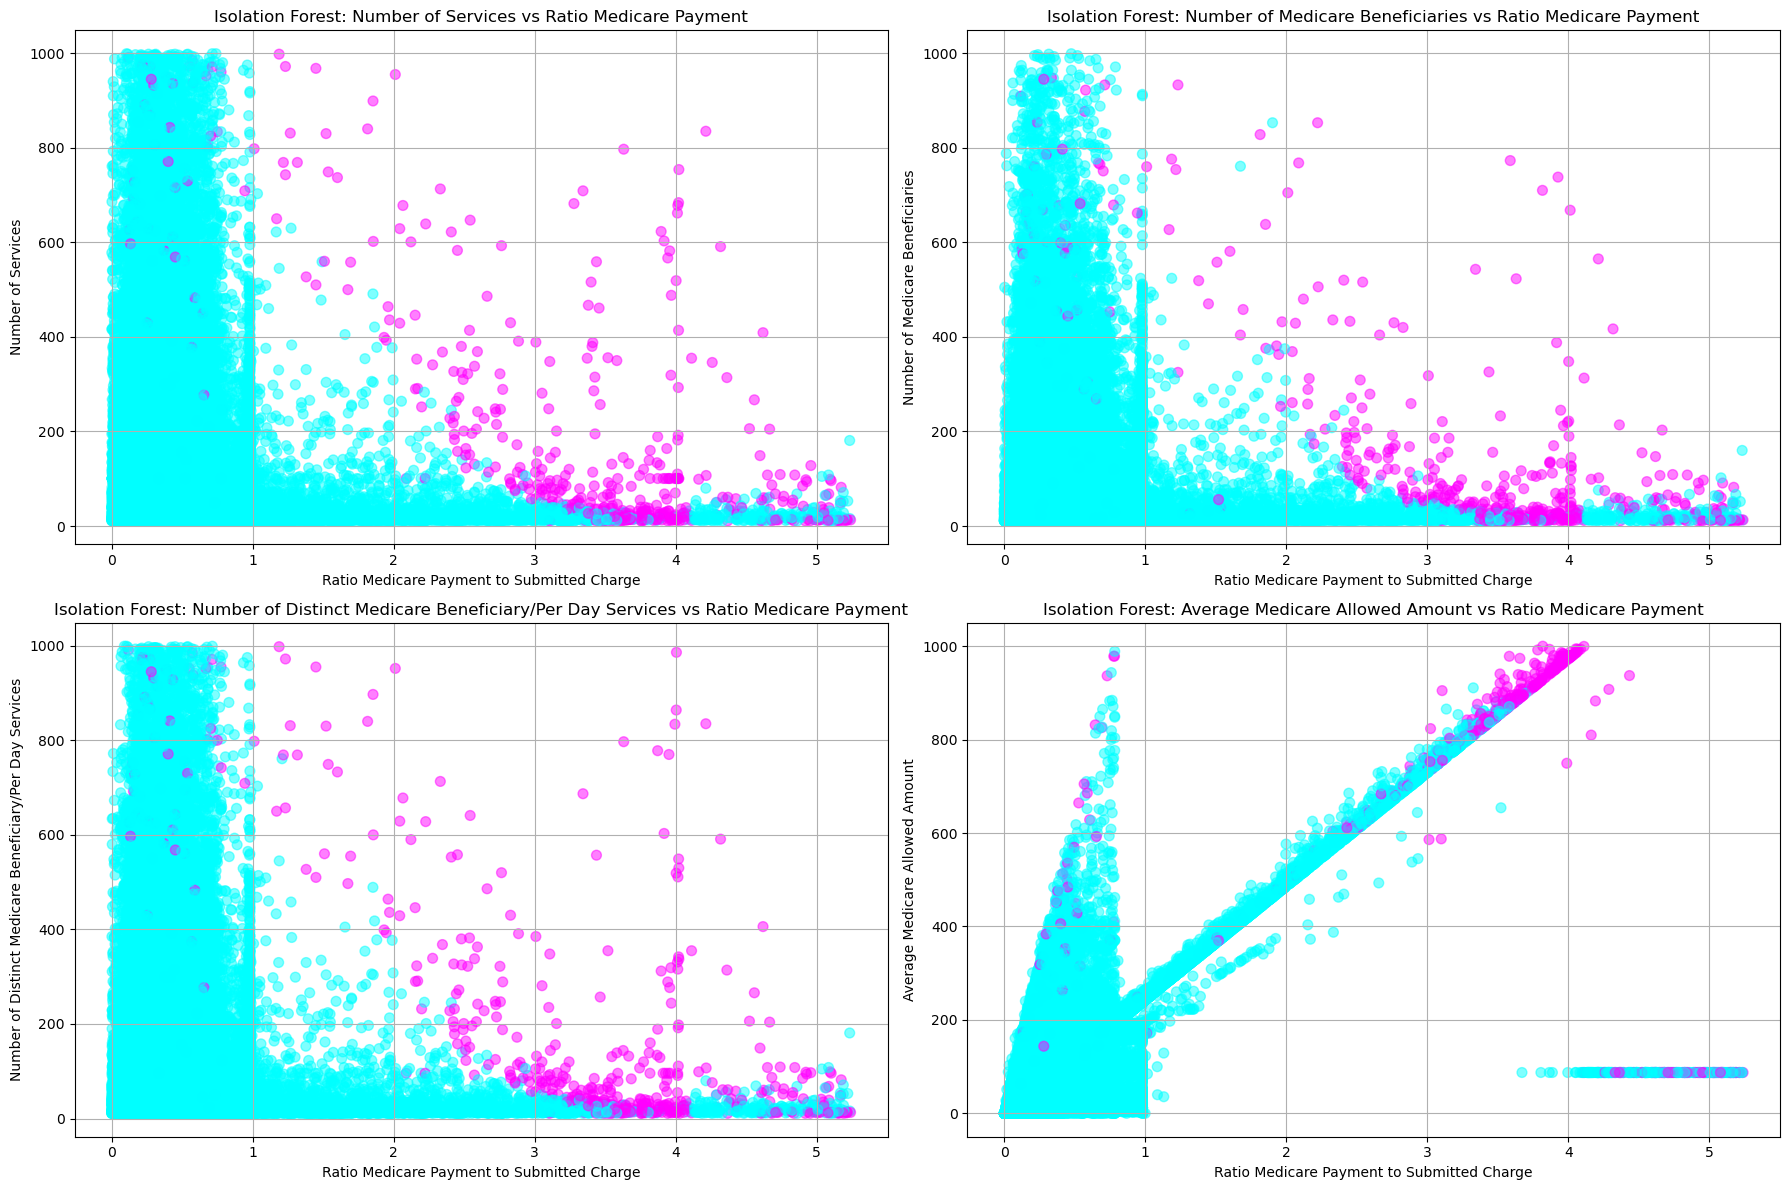

In [49]:
# Scatter plots for Isolation Forest
plt.figure(figsize=(18, 12))
features = ['Number of Services', 'Number of Medicare Beneficiaries', 
            'Number of Distinct Medicare Beneficiary/Per Day Services', 
            'Average Medicare Allowed Amount']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df_anamoly['Ratio Medicare Payment to Submitted Charge'], df_anamoly[feature], 
                c=df_transformed['Anomaly_IF'], cmap='cool', s=50, alpha=0.5)
    plt.title(f'Isolation Forest: {feature} vs Ratio Medicare Payment')
    plt.xlabel('Ratio Medicare Payment to Submitted Charge')
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [50]:
# Define threshold
threshold = 1.5 * df_anamoly.std()

# Function to count anomalies for each feature
def count_anomalies(df_anamoly, threshold, anomalies):
    anomaly_counts = []
    for col in df_anamoly.columns:
        count = ((df_anamoly[col] > threshold[col]) & (anomalies == 1)).sum()
        anomaly_counts.append(count)
    return anomaly_counts

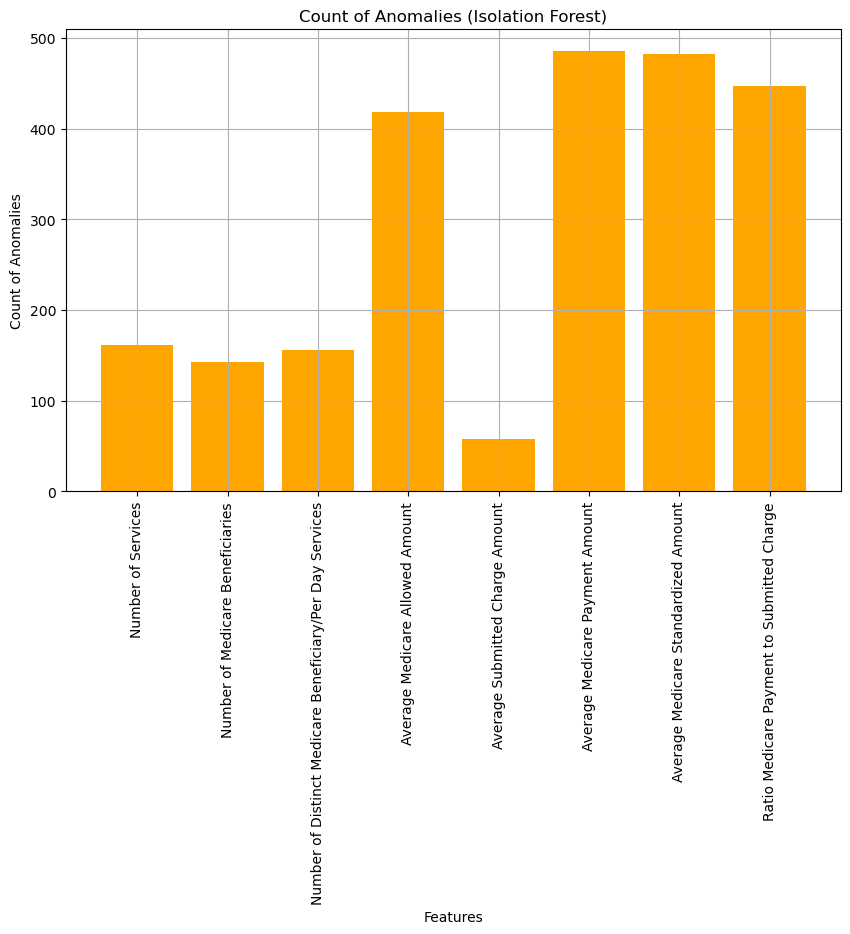

In [51]:
anomaly_counts_if = count_anomalies(df_anamoly, threshold, df_transformed['Anomaly_IF'])

plt.figure(figsize=(10, 6))
plt.bar(df_anamoly.columns, anomaly_counts_if, color='orange')
plt.title('Count of Anomalies (Isolation Forest)')
plt.xlabel('Features')
plt.ylabel('Count of Anomalies')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

100%|===================| 99999/100000 [11:31<00:00]        

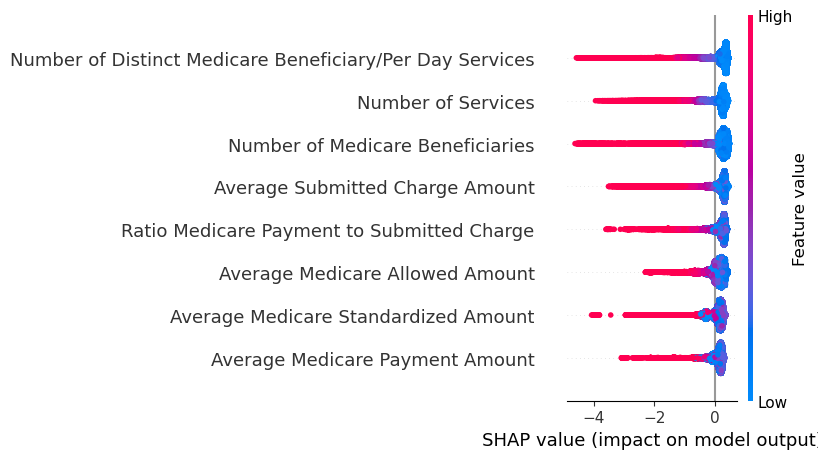

In [52]:
import shap

# SHAP analysis for Isolation Forest
explainer_if = shap.Explainer(isolation_forest, df_anamoly)
shap_values_if = explainer_if(df_anamoly)

# SHAP summary plot
shap.summary_plot(shap_values_if, df_anamoly)

Elliptic Envelope

In [53]:
from sklearn.covariance import EllipticEnvelope

# Elliptic Envelope
elliptic_envelope = EllipticEnvelope(contamination=0.005, random_state=42)
elliptic_envelope.fit(df_anamoly)
df_transformed['Anomaly_EE'] = elliptic_envelope.predict(df_anamoly)
df_transformed['Anomaly_EE'] = df_transformed['Anomaly_EE'].map({1: 0, -1: 1})
print("Elliptic Envelope anomalies detected:", df_transformed['Anomaly_EE'].sum())

Elliptic Envelope anomalies detected: 500


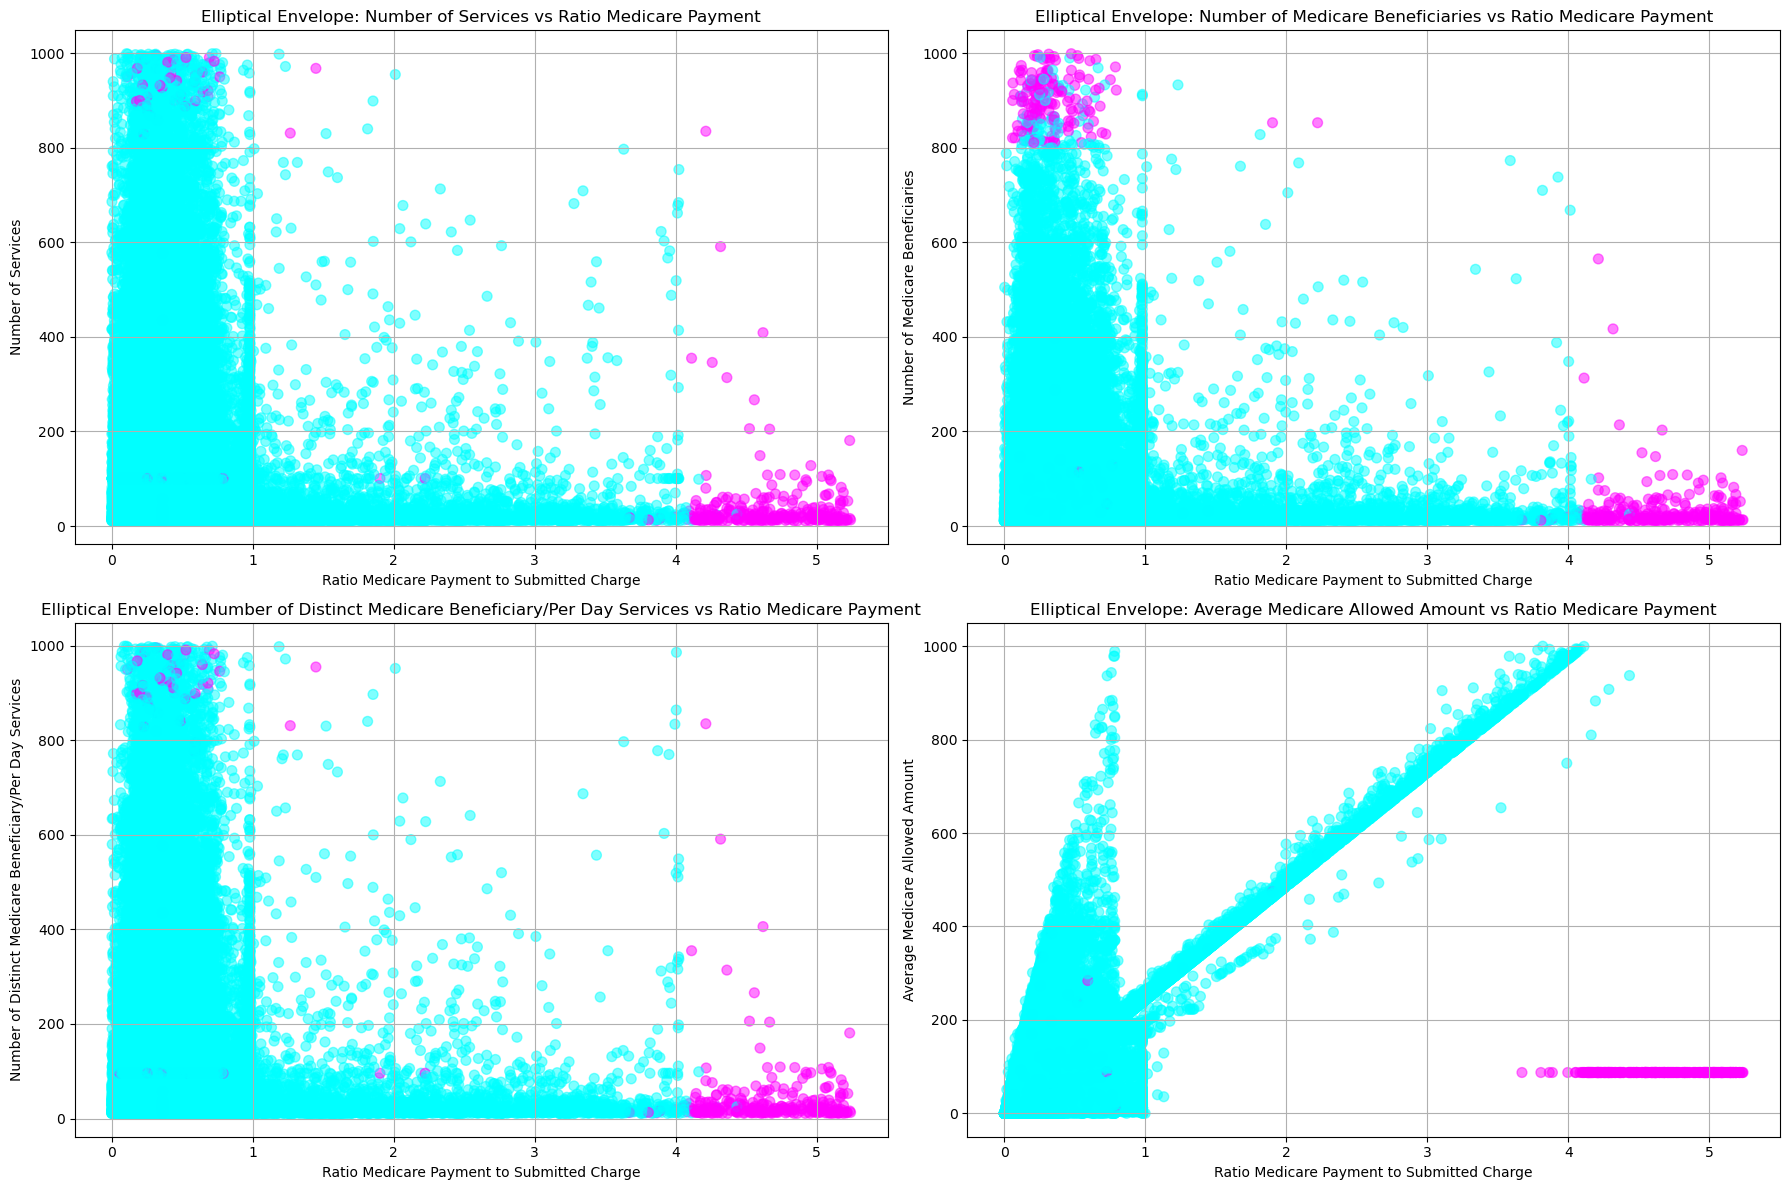

In [54]:
# Scatter plots for Elliptical Envelope
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df_anamoly['Ratio Medicare Payment to Submitted Charge'], df_anamoly[feature], 
                c=df_transformed['Anomaly_EE'], cmap='cool', s=50, alpha=0.5)
    plt.title(f'Elliptical Envelope: {feature} vs Ratio Medicare Payment')
    plt.xlabel('Ratio Medicare Payment to Submitted Charge')
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

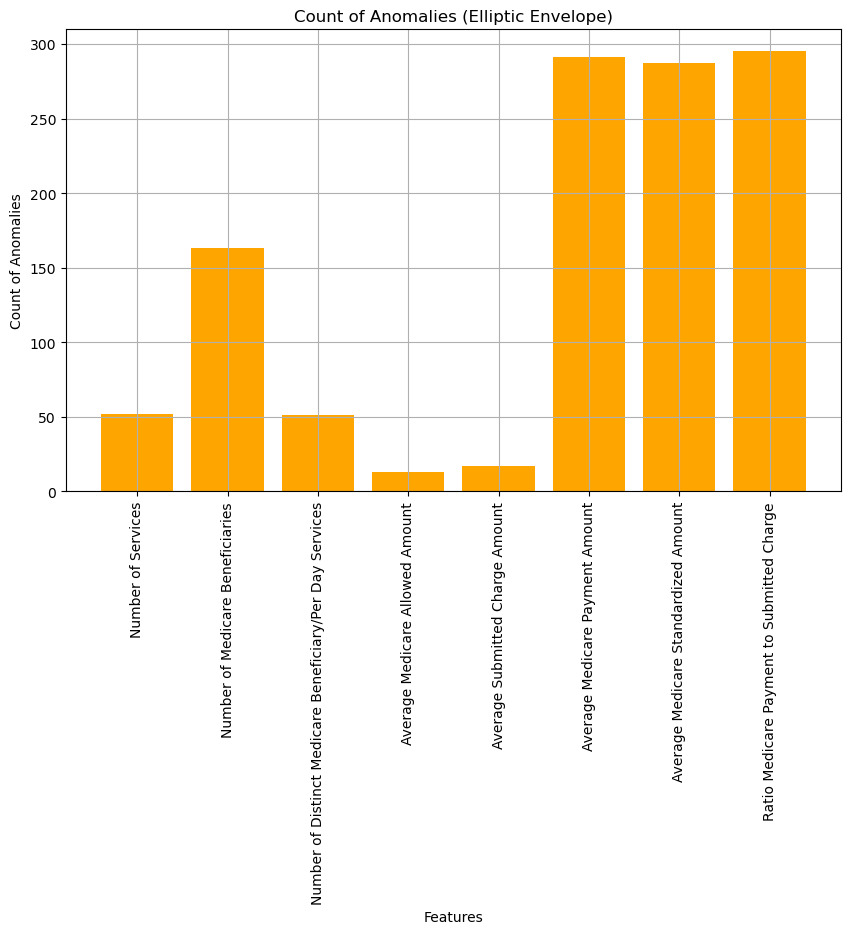

In [55]:
anomaly_counts_ee = count_anomalies(df_anamoly, threshold, df_transformed['Anomaly_EE'])

plt.figure(figsize=(10, 6))
plt.bar(df_anamoly.columns, anomaly_counts_ee, color='orange')
plt.title('Count of Anomalies (Elliptic Envelope)')
plt.xlabel('Features')
plt.ylabel('Count of Anomalies')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# SHAP analysis for Elliptic Envelope
explainer_ee = shap.Explainer(elliptic_envelope.decision_function, df_anamoly)
shap_values_ee = explainer_ee(df_anamoly)

# SHAP summary plot
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_ee, df_anamoly, plot_type='bar')
plt.title('SHAP Summary Plot for Elliptic Envelope')
plt.show()

One Class SVM

In [57]:
from sklearn.svm import OneClassSVM

# One-Class SVM
one_class_svm = OneClassSVM(nu=0.005)
one_class_svm.fit(df_anamoly)
df_transformed['Anomaly_SVM'] = one_class_svm.predict(df_anamoly)
df_transformed['Anomaly_SVM'] = df_transformed['Anomaly_SVM'].map({1: 0, -1: 1})
print("One-Class SVM anomalies detected:", df_transformed['Anomaly_SVM'].sum())

One-Class SVM anomalies detected: 504


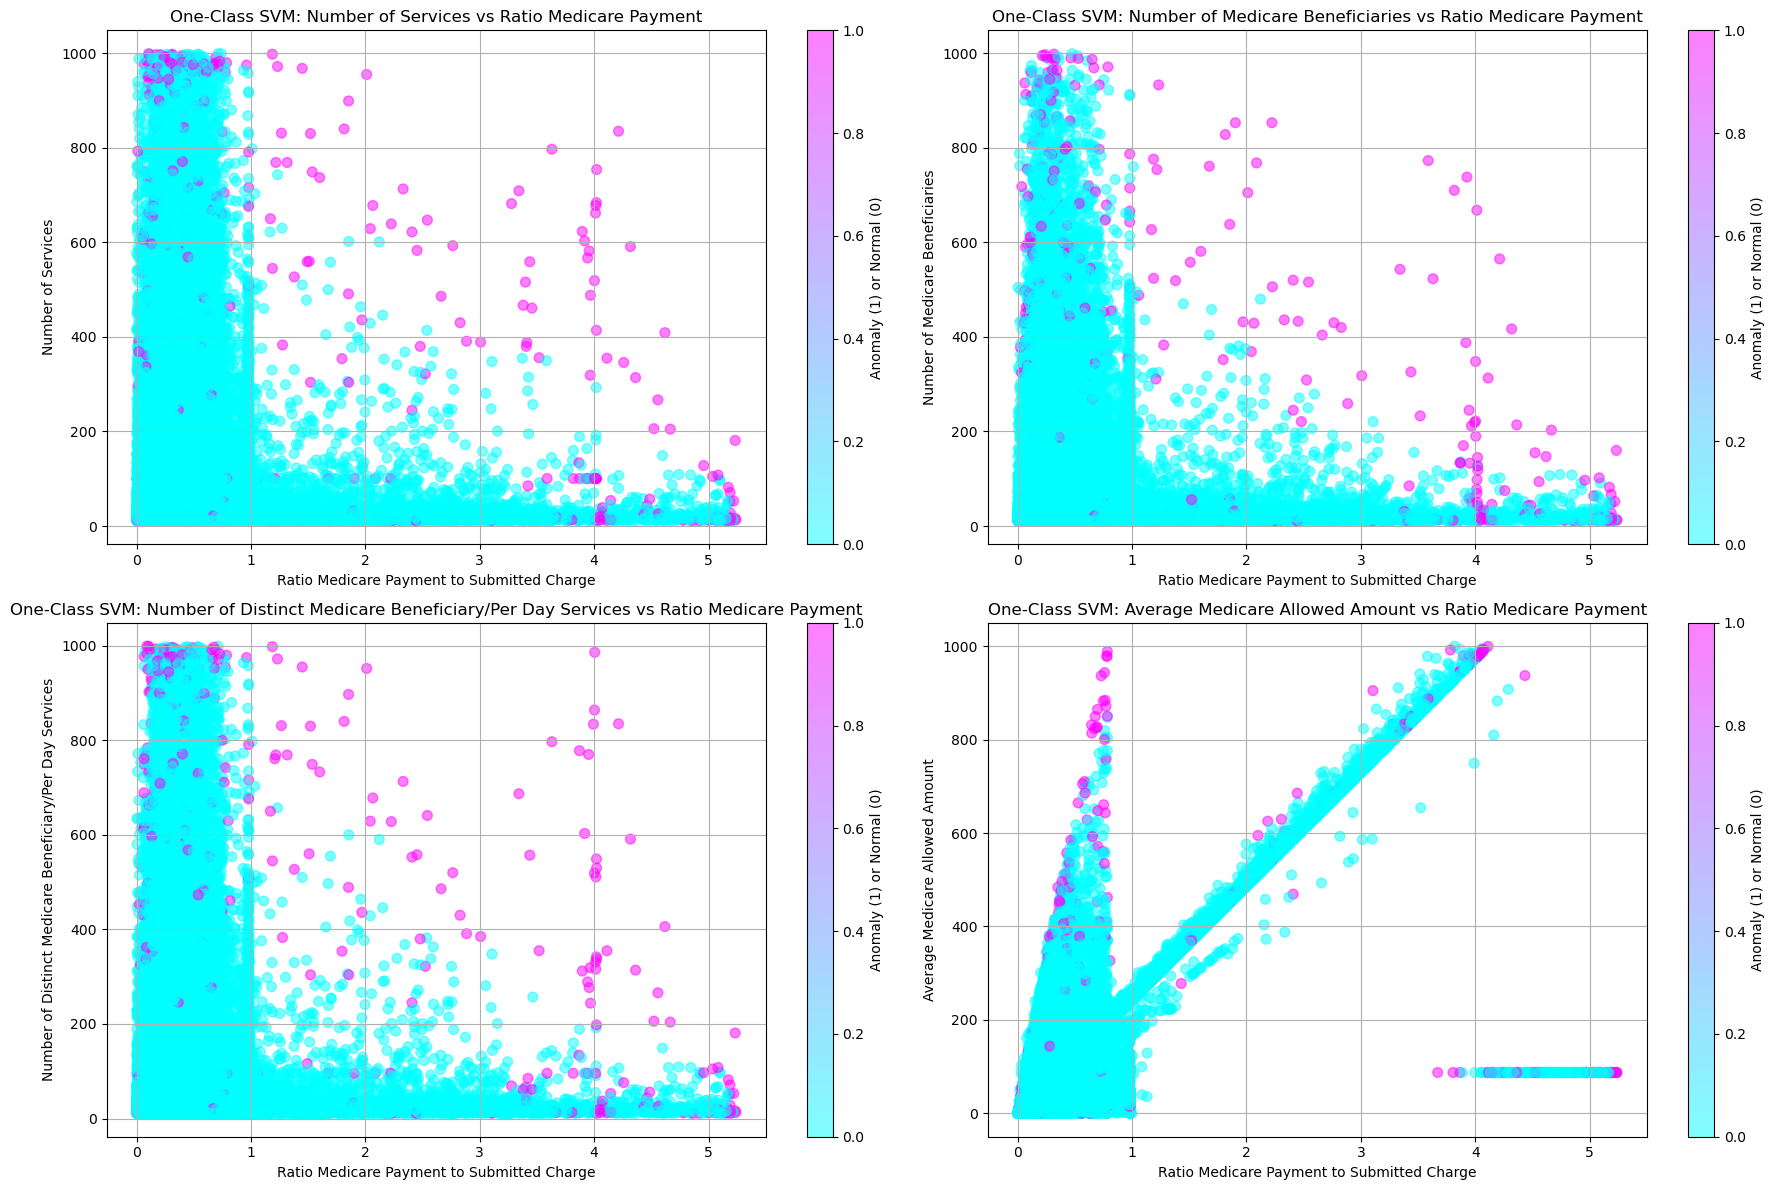

In [58]:
# Scatter plots for One-Class SVM
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df_anamoly['Ratio Medicare Payment to Submitted Charge'], df_anamoly[feature], 
                c=df_transformed['Anomaly_SVM'], cmap='cool', s=50, alpha=0.5)
    plt.title(f'One-Class SVM: {feature} vs Ratio Medicare Payment')
    plt.xlabel('Ratio Medicare Payment to Submitted Charge')
    plt.ylabel(feature)
    plt.colorbar(label='Anomaly (1) or Normal (0)')
    plt.grid(True)

plt.tight_layout()
plt.show()

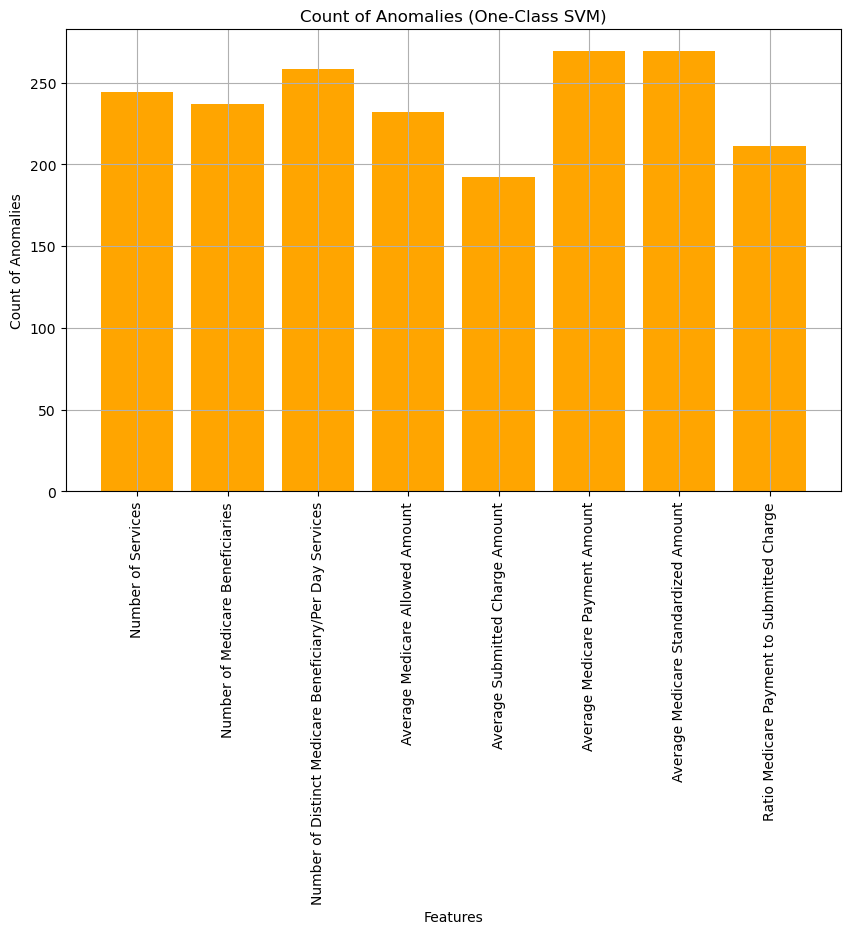

In [59]:
anomaly_counts_svm = count_anomalies(df_anamoly, threshold, df_transformed['Anomaly_SVM'])

plt.figure(figsize=(10, 6))
plt.bar(df_anamoly.columns, anomaly_counts_svm, color='orange')
plt.title('Count of Anomalies (One-Class SVM)')
plt.xlabel('Features')
plt.ylabel('Count of Anomalies')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# SHAP analysis for One-Class SVM
explainer_svm = shap.Explainer(one_class_svm.decision_function, df_anamoly)
shap_values_svm = explainer_svm(df_anamoly)

# SHAP summary plot
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_svm, df_anamoly, plot_type='bar')
plt.title('SHAP Summary Plot for One-Class SVM')
plt.show()